In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf

# From time stamps
from datetime import datetime 

# The tech stocks we'll use for this analysis
tech_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download the data using yfinance directly
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)

# Create a list of the downloaded data
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Add company names and concatenate into a single dataframe
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

# Display the last 10 rows of the dataframe
df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-25,174.199997,176.970001,174.149994,176.080002,175.183563,46172700,APPLE
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.084549,64588900,APPLE
2023-09-27,172.619995,173.039993,169.050003,170.429993,169.562317,66921800,APPLE
2023-09-28,169.339996,172.029999,167.619995,170.690002,169.821014,56294400,APPLE
2023-09-29,172.020004,173.070007,170.339996,171.210007,170.338379,51814200,APPLE
...,...,...,...,...,...,...,...
2024-09-16,185.289993,185.809998,183.360001,184.889999,184.889999,26065500,AMAZON
2024-09-17,186.850006,189.449997,186.139999,186.880005,186.880005,26091700,AMAZON
2024-09-18,186.449997,188.800003,185.059998,186.429993,186.429993,34448100,AMAZON


In [5]:
# Sumary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,192.835760,194.637400,191.194680,193.027240,192.558911,5.980534e+07
std,19.567067,19.816929,19.123853,19.498459,19.682353,2.969083e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,175.799999,177.877499,174.872501,176.774994,176.142296,4.507275e+07
50%,189.360001,190.480003,187.889999,189.389999,188.674042,5.300555e+07
75%,211.222500,214.230003,208.775002,210.419998,210.176716,6.556088e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,3.185822e+08


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-09-25 to 2024-09-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


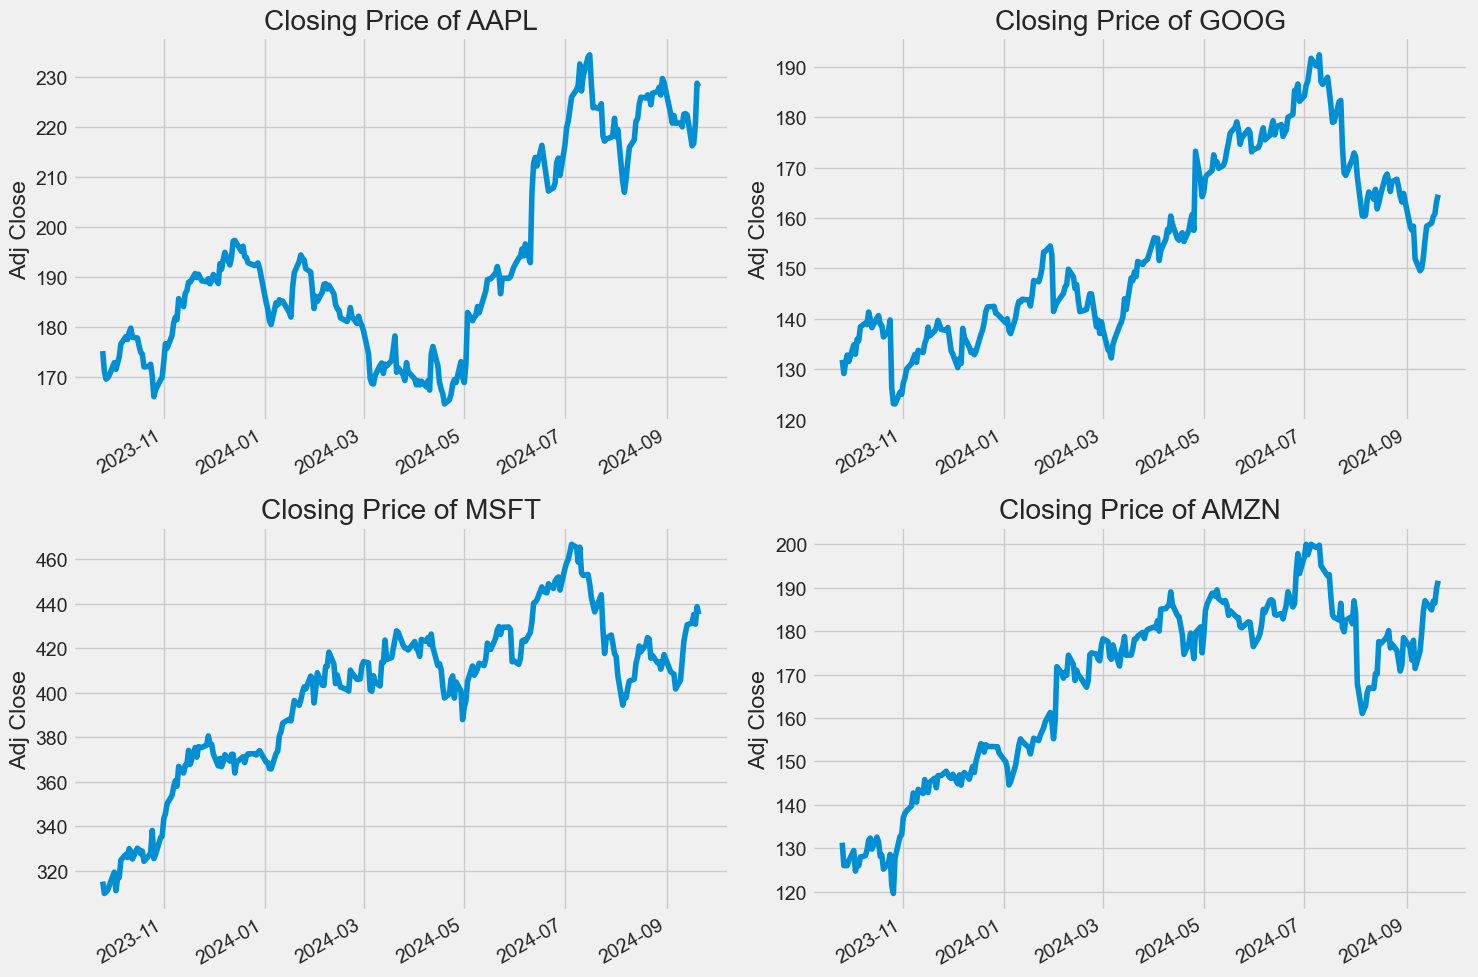

In [7]:
# Let's see a historical view of the closing price
plt.figure(figsize = (15,10))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for i, company in enumerate (company_list, 1):
    plt.subplot(2, 2, i)
    company["Adj Close"].plot()
    plt.ylabel("Adj Close")
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()
plt.show()

Volume of Sales

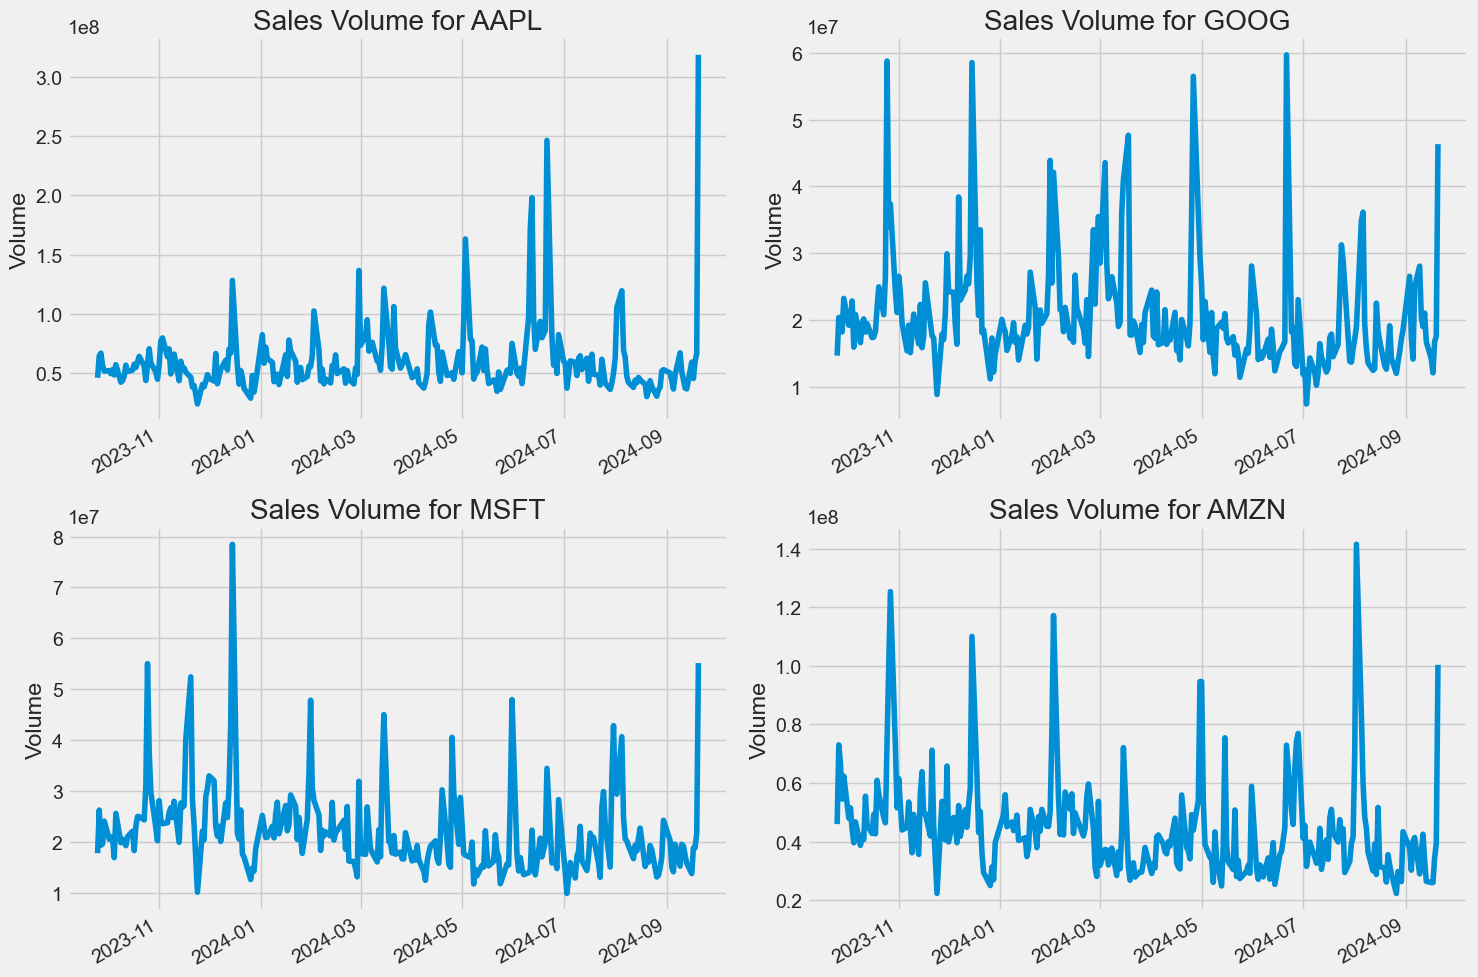

In [8]:
# Let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company["Volume"].plot()
    plt.ylabel("Volume")
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()
plt.show()

What was the Moving Average of the verious Stock

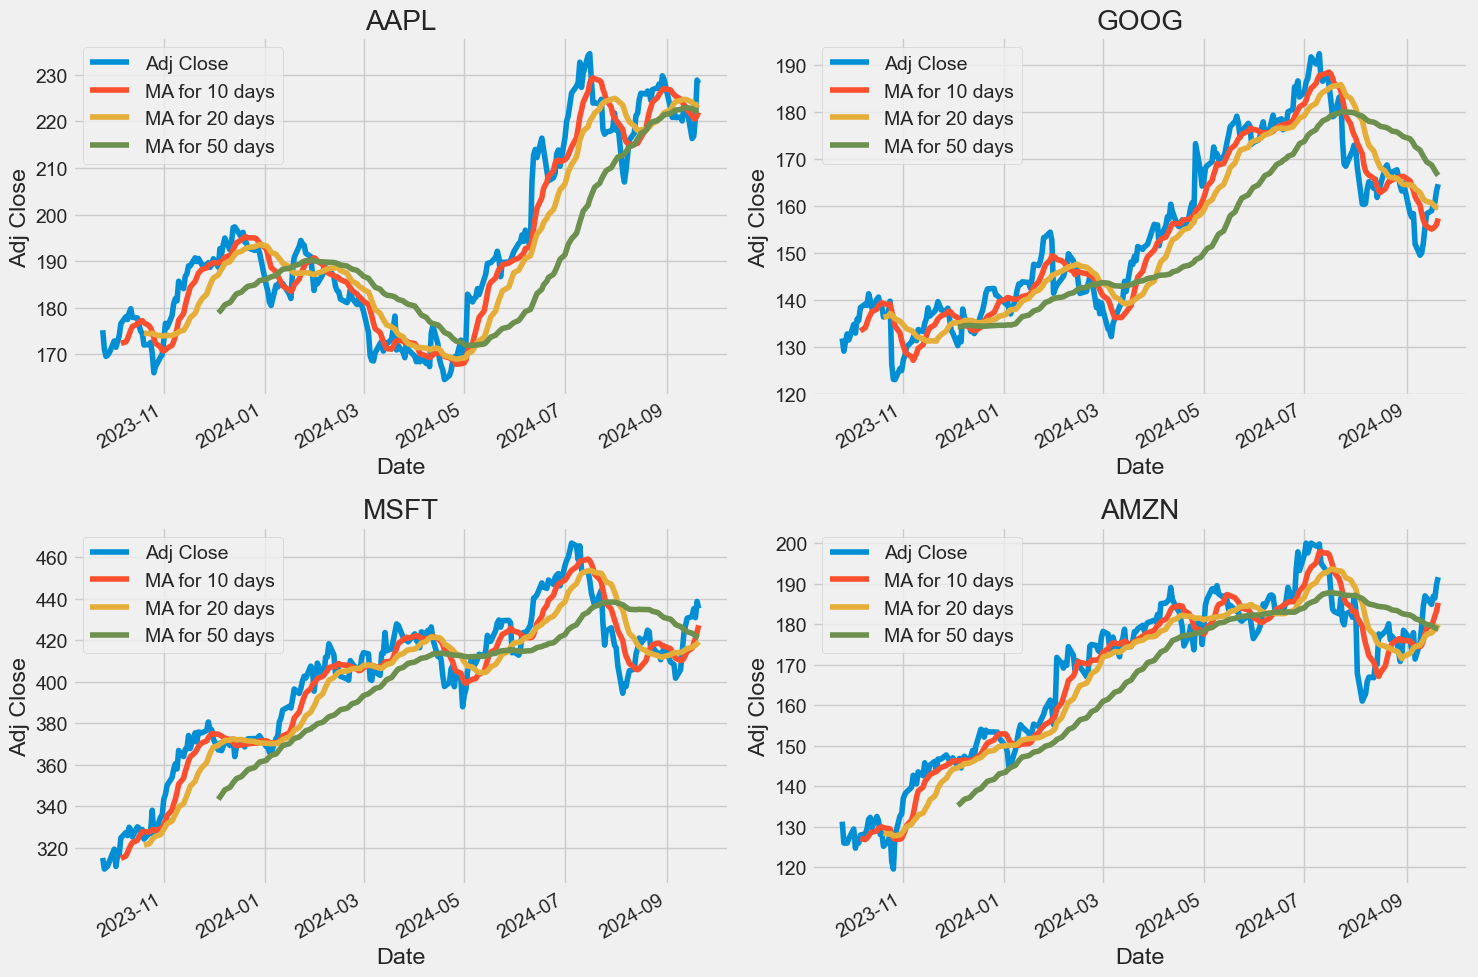

In [10]:
ma_day = [10, 20, 50]

# Calculate moving averages
for ma in ma_day:
    for company in company_list:  # Corrected typo here
        column_name = f"MA for {ma} days"
        company[column_name] = company["Adj Close"].rolling(ma).mean()

# Plotting the data
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    # Plot the adjusted close price along with the moving averages
    company[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=plt.gca())
    plt.ylabel("Adj Close")
    plt.title(f"{tech_list[i - 1]}")

plt.tight_layout()
plt.show()


What was the Daily Return of the Stock on Average?

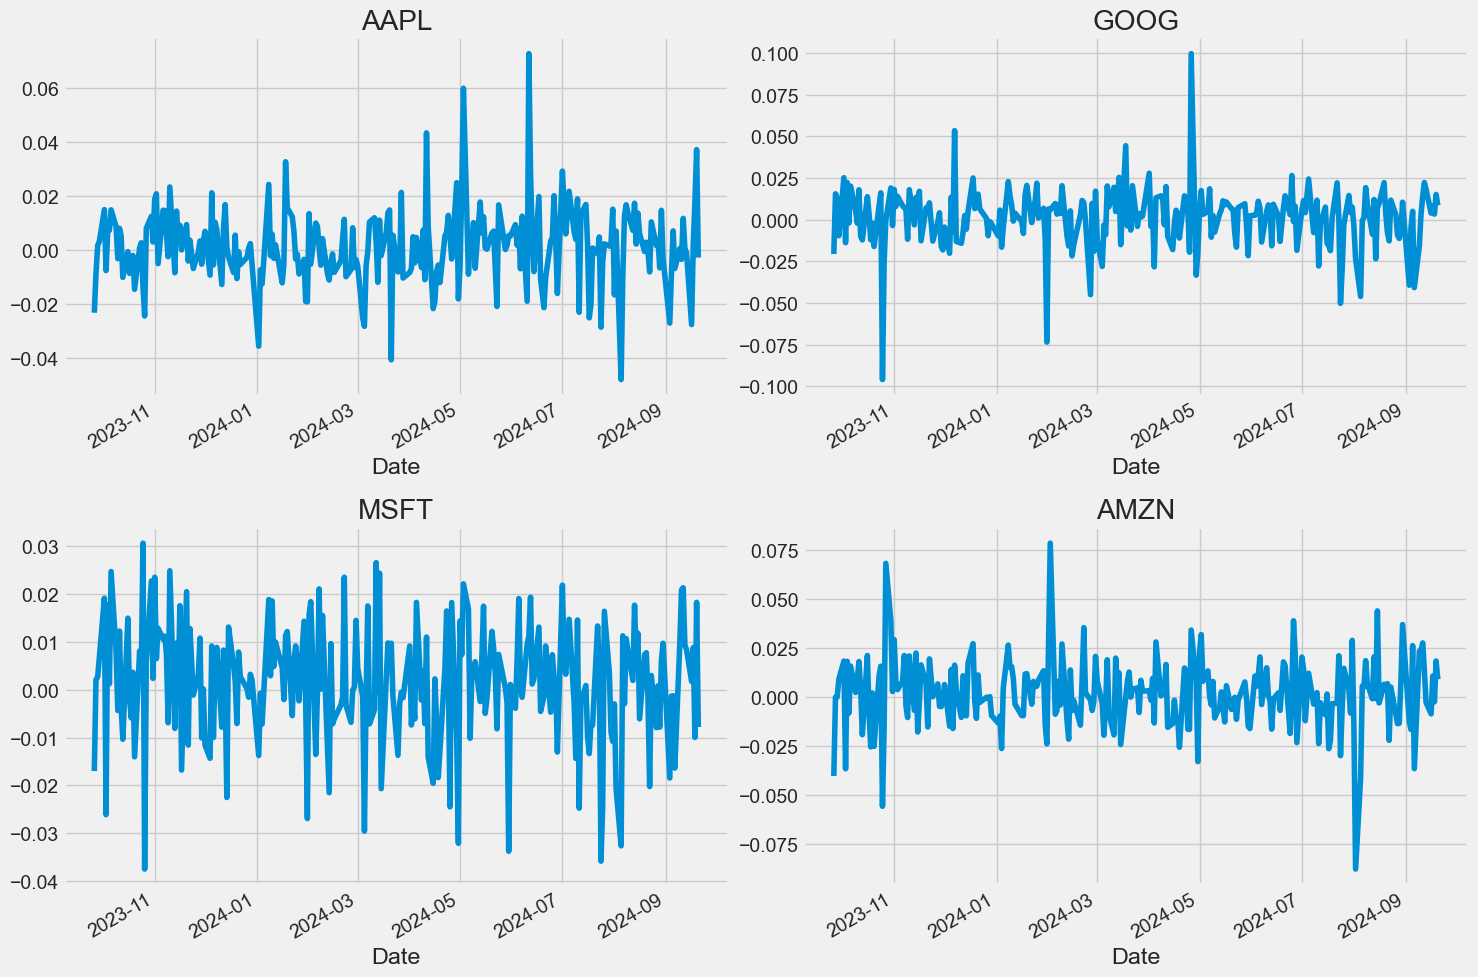

In [11]:
# We will use pct_change to find the percent change for each day
for company in company_list:
    company["Daily Returns"] = company["Adj Close"].pct_change()

# Then we will plot the daily return percentage
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company["Daily Returns"].plot()
    plt.title(f"{tech_list[i - 1]}")

plt.tight_layout()
plt.show()

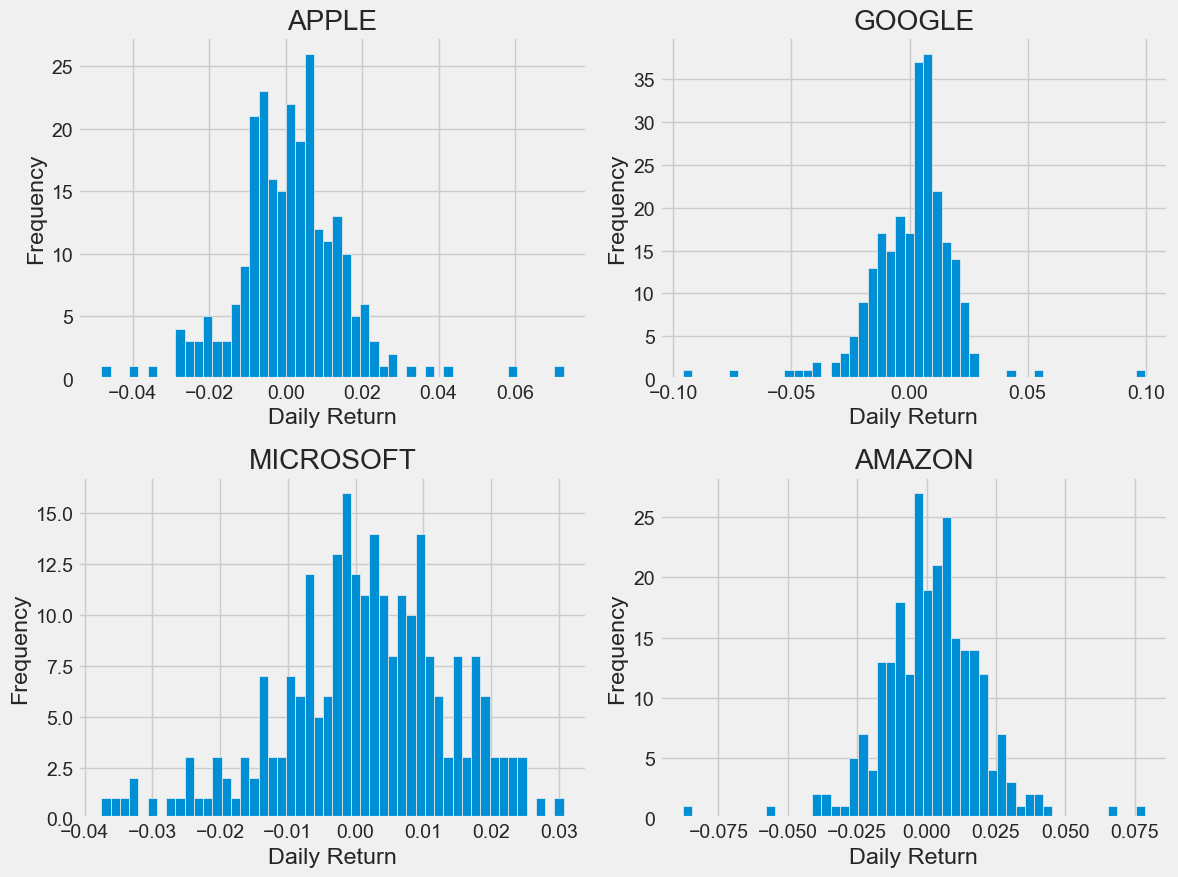

In [13]:
plt.figure(figsize=(12,9))

for i, company in enumerate(company_list, 1) :
    plt.subplot(2, 2, i)
    company["Daily Returns"].hist(bins = 50)
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.title(f"{company_name[i - 1]}")

plt.tight_layout()
plt.show() 

What was the Correlation between different stocks closing prices?